In [96]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
import scipy.io
def load_emnist(file_path='emnist-digits.mat'):
    """
    Loads training and test data with ntr and nts training and test samples
    The `file_path` is the location of the `eminst-balanced.mat`.
    """    
    
    # Load the MATLAB file
    mat = scipy.io.loadmat(file_path)
    
    # Get the training data
    Xtr = mat['dataset'][0][0][0][0][0][0][:]
    ntr = Xtr.shape[0]
    ytr = mat['dataset'][0][0][0][0][0][1][:].reshape(ntr).astype(int)
    
    # Get the test data
    Xts = mat['dataset'][0][0][1][0][0][0][:]
    nts = Xts.shape[0]
    yts = mat['dataset'][0][0][1][0][0][1][:].reshape(nts).astype(int)
    
    print("%d training samples, %d test samples loaded" % (ntr, nts))

    return [Xtr, Xts, ytr, yts]

In [98]:
Xtr_dig, Xts_dig, ytr_dig, yts_dig = load_emnist()
Xtr_let, Xts_let, ytr_let, yts_let = load_emnist(file_path='emnist-letters.mat')

240000 training samples, 40000 test samples loaded
124800 training samples, 20800 test samples loaded


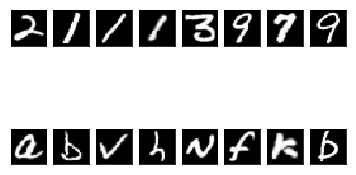

In [99]:
def plt_digit(x,y=None):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq.T,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])    
    if y != None:
        plt.title('%d' % y)     
        
nplt = 8
nsamp = Xtr_dig.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(2,nplt,i+1)
    plt_digit(Xtr_dig[ind,:])
    
nplt = 8
nsamp = Xtr_let.shape[0]
Iperm = np.random.permutation(nsamp)

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(2,nplt,i+1+nplt)
    plt_digit(Xtr_let[ind,:])

In [100]:
Xtrd=np.reshape(Xtr_dig,(240000,28,28),order='F')
Xtsd=np.reshape(Xts_dig,(40000,28,28),order='F')
Xtrl=np.reshape(Xtr_let,(124800,28,28),order='F')
Xtsl=np.reshape(Xts_let,(20800,28,28),order='F')
# TODO: Augment to 32*32 with black margin, deal with 3 channel colors

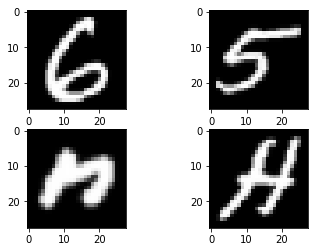

In [101]:
plt.subplot(2,2,1)
plt.imshow(Xtrd[np.random.randint(1,20000),:,:],cmap='Greys_r')
plt.subplot(2,2,2)
plt.imshow(Xtsd[np.random.randint(1,20000),:,:],cmap='Greys_r')
plt.subplot(2,2,3)
plt.imshow(Xtrl[np.random.randint(1,20000),:,:],cmap='Greys_r')
plt.subplot(2,2,4)
plt.imshow(Xtsl[np.random.randint(1,20000),:,:],cmap='Greys_r')
plt.show()

In [102]:
# dig: 240000 training samples, 40000 test samples loaded
# let: 124800 training samples, 20800 test samples loaded
# Number of training and test digits and letters
ntr_dig = 9000
ntr_let = 26000
nts_dig = 3000
nts_let = 7000
# TODO: proper decide the number of samples and the ratio between dig and let

# Create sub-sampled training and test data
nsamp = Xtr_dig.shape[0]
Iperm = np.random.permutation(nsamp)
Xtr1_dig = Xtrd[Iperm[:ntr_dig],:,:]
ytr1_dig = ytr_dig[Iperm[:ntr_dig]]
nsamp = Xts_dig.shape[0]
Iperm = np.random.permutation(nsamp)
Xts1_dig = Xtsd[Iperm[:nts_dig],:,:]
yts1_dig = yts_dig[Iperm[:nts_dig]]
nsamp = Xtr_let.shape[0]
Iperm = np.random.permutation(nsamp)
Xtr1_let = Xtrl[Iperm[:ntr_let],:,:]
ytr1_let = ytr_let[Iperm[:ntr_let]]
nsamp = Xts_let.shape[0]
Iperm = np.random.permutation(nsamp)
Xts1_let = Xtsl[Iperm[:nts_let],:,:]
yts1_let = yts_let[Iperm[:nts_let]]

In [103]:
from __future__ import print_function
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model #save and load models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K

In [104]:
ytr2_let=ytr1_let+9
yts2_let=yts1_let+9
x_train=np.concatenate((Xtr1_dig, Xtr1_let), axis=0)
y_train=np.concatenate((ytr1_dig, ytr2_let), axis=0)
y_train=y_train.reshape((len(y_train),1))
x_test=np.concatenate((Xts1_dig, Xts1_let), axis=0)
y_test=np.concatenate((yts1_dig, yts2_let), axis=0)
y_test=y_test.reshape((len(y_test),1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train=x_train.reshape((ntr_dig+ntr_let,28,28,1))
x_test=x_test.reshape((nts_dig+nts_let,28,28,1))

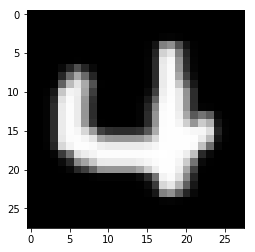

In [105]:
myxt=np.zeros((28,28))
myxt[:,:]=x_test[np.random.randint(1,25000),:,:,0]
plt.imshow(myxt,cmap='Greys_r')

In [106]:
print(x_train.shape)
#print(x_train[233,15:20,15:20])
#print(y_train[4990:5050].T)
print(y_train.shape[0])
print(np.min(ytr1_let))

(35000, 28, 28, 1)
35000
1


In [107]:
# Convert class vectors to binary class matrices.
# TODO: maybe make it different between some upper and lower case?
num_classes = 36
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Number of classes:', y_train.shape[1])

Number of classes: 36


In [108]:
batch_size = 64
epochs = 8
lrate = 0.05
decay = lrate/epochs

In [109]:
# TODO: 36/62 channels?
K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='valid', 
                 input_shape=x_train.shape[1:],
                 activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))   #+0.01
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(28, (3, 3), padding='valid', activation='relu'))   #+0.00
#model.add(BatchNormalization())

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dense(62, activation='relu'))   #+0.01
#model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [110]:
# initiate Adam optimizer
opt = keras.optimizers.adam(lr=lrate, decay=decay)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
__________

In [111]:
seed=7
k=1
# Fit the model
np.random.seed(seed)
class_weight={0:k*2,1:k*4,2:k,3:k,4:k,5:k,6:k,7:k,8:k,9:k,10:k,11:k,12:k,13:k,14:k,15:k,16:k,17:k,18:k,19:k,20:k,21:k*1.4,
              22:k,23:k,24:k,25:k,26:k,27:k,28:k,29:k,30:k,31:k,32:k,33:k,34:k,35:k}
hist_basic = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True,
                       #class_weight=class_weight
                      )

print('Done!')

Train on 35000 samples, validate on 10000 samples
Epoch 1/8
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0652 - acc: 0.7411 - val_loss: 0.5435 - val_acc: 0.8190
Epoch 2/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.4066 - acc: 0.8521 - val_loss: 0.4006 - val_acc: 0.8581
Epoch 3/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.3226 - acc: 0.8793 - val_loss: 0.4135 - val_acc: 0.8556
Epoch 4/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.2718 - acc: 0.8942 - val_loss: 0.3829 - val_acc: 0.8670
Epoch 5/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.2321 - acc: 0.9085 - val_loss: 0.3723 - val_acc: 0.8664
Epoch 6/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.2091 - acc: 0.9153 - val_loss: 0.3932 - val_acc: 0.8656
Epoch 7/8
35000/35000 [==============================] - 48s 1ms/step - loss: 0.1803 - acc: 0.9281 - val_loss: 0.4042 - val_acc: 0.865

In [112]:
model.save("emnist_BatchNormalization_32_classwight_manally_k2.h5")
model = load_model("emnist_BatchNormalization_32_classwight_manally_k2.h5")

[[2.4893074e-10 6.3572810e-12 8.4230848e-13 1.0607520e-12 1.4420394e-10
  4.0657096e-13 9.9987924e-01 1.1912428e-14 1.2676164e-11 1.0305839e-12
  1.6423507e-09 2.8854958e-09 2.4680200e-09 1.4268894e-11 6.5435281e-15
  6.9431830e-12 1.2068289e-04 4.7971875e-13 4.6779414e-10 6.4825402e-13
  9.9713883e-12 2.0835880e-09 5.4234868e-17 8.2593674e-16 4.5571717e-11
  4.6325975e-13 2.3096451e-09 2.7836501e-15 5.6948266e-12 3.5427387e-14
  3.3805809e-11 8.2458031e-15 3.0006694e-13 2.7666894e-16 1.1855140e-12
  7.9351510e-14]]
6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6


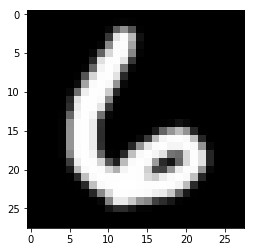

In [113]:
myn=np.random.randint(1,20000)
myxtr=np.array(x_train[myn,:,:,:])
myxtrp=np.reshape(myxtr,(28,28))
plt.imshow(myxtrp,cmap='Greys_r')
myxtr=np.reshape(myxtr,(1,28,28,1))
preds = model.predict(myxtr)
print(preds)
print(np.argmax(preds))
print(y_train[myn])
if np.argmax(y_train[myn])<10:
    ascii=48+np.argmax(y_train[myn])
else:
    ascii=87+np.argmax(y_train[myn])
print(chr(ascii))

In [114]:
# confusion matrix
yhat=model.predict(x_test)
yhatp=np.argmax(yhat,axis=1)
ytsp=np.argmax(y_test,axis=1)
acc = np.mean(yhatp == ytsp)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.867400


[[0.37  0.    0.    ... 0.    0.    0.   ]
 [0.    0.726 0.    ... 0.    0.    0.   ]
 [0.    0.    0.89  ... 0.    0.    0.071]
 ...
 [0.    0.    0.    ... 0.962 0.015 0.   ]
 [0.    0.    0.    ... 0.027 0.827 0.   ]
 [0.    0.    0.103 ... 0.004 0.    0.878]]


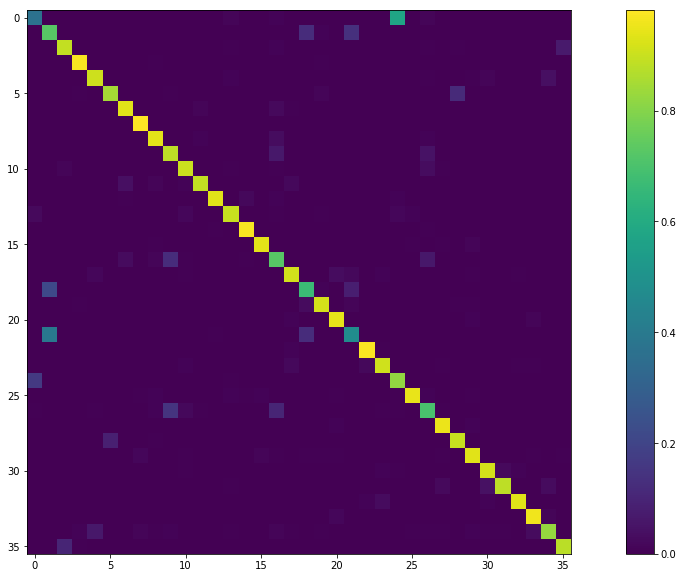

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

C = confusion_matrix(ytsp,yhatp)

# Normalize the confusion matrix
#Csum = np.sum(C,1)
#C = C / Csum[None,:]
C = normalize(C, norm='l1', axis=1)

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.figure(figsize=(20, 10)) 
plt.imshow(C, interpolation='none')
plt.colorbar()

In [116]:
Cd=C.diagonal()
print(Cd)
print(np.where(Cd<0.8))

[0.37       0.72627737 0.89032258 0.9704797  0.90734824 0.84984985
 0.93729373 0.98130841 0.94181818 0.88333333 0.90421456 0.89084507
 0.93548387 0.89811321 0.97183099 0.94197952 0.72490706 0.91304348
 0.66914498 0.91666667 0.94604317 0.47808765 0.97416974 0.90875912
 0.82051282 0.94941634 0.69921875 0.95121951 0.9        0.93801653
 0.91911765 0.88321168 0.93726937 0.96183206 0.82745098 0.8778626 ]
(array([ 0,  1, 16, 18, 21, 26]),)
